In [1]:
import os
#from subprocess import call #would prefer over os.system
import pandas as pd
import numpy
from scipy import ndimage
import cv2

In [2]:
#Objects given by https://pjreddie.com/darknet/yolo/
#os.system("./darknet detector test ./cfg/coco.data ./cfg/yolov3.cfg ./yolov3.weights /Users/ryan/Documents/Art185-final/pikamarch.jpg > results.txt")

In [3]:
#printf("%s: %.0f%%\n", names[j], dets[i].prob[j]*100); include probabilities
text_file = open("results.txt", "r")
lines = text_file.readlines()
text_file.close()
objType = []
objCoord = [] #left, right, top, bottom
coordSet = [[],[],[],[]]
for i in range(1, len(lines), 2):
    objType.append(lines[i])
    objCoord.append(lines[i+1])
for i in range(0, len(objType)):
    objType[i] = objType[i].rstrip()
    objCoord[i] = objCoord[i].rstrip()
    objCoord[i] = objCoord[i].split(',')
    for j in range(4):
        coordSet[j].append(objCoord[i][j])

objects = pd.DataFrame({'Type': objType,
     'Left': coordSet[0],
     'Right': coordSet[1],
     'Top': coordSet[2],
     'Bottom': coordSet[3],
    })
print(objects)

          Type  Left  Right   Top Bottom
0   teddy bear   225    299   242    378
1   teddy bear   300    387   243    390
2   teddy bear   196    245   241    364
3       person    11     66   265    395
4       person   969   1023   240    398
5       person  1248   1279   236    335
6       person  1100   1156   250    434
7       person     0     95   284    719
8       person   842    885   270    389
9       person   590    639   251    375
10      person   371    409   182    250
11      person   922    979   236    400
12      person  1033   1092   220    405
13      person  1161   1222   253    427


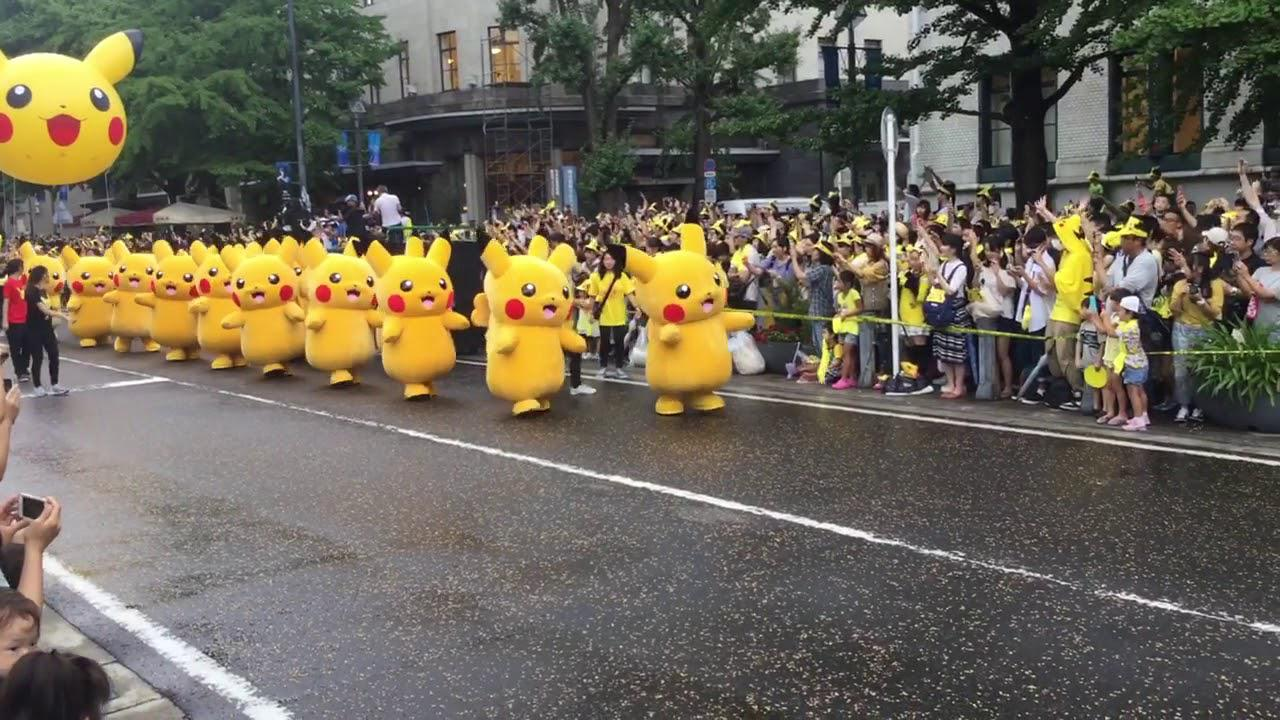

In [4]:
import PIL.Image
import IPython.display
from io import BytesIO

def show_img_PIL(img, fmt='jpeg'):
    f = BytesIO()
    img.save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

img_PIL = PIL.Image.open('pikamarch.jpg')
img = numpy.array(img_PIL)
img2 = img
img.shape
show_img_PIL(PIL.Image.fromarray(img))

In [5]:
#make objects
class Thing():
    
    Type = "Item"
    left = 0
    right = 0 
    top = 0
    bottom = 0
    width = 0
    height = 0
    
    pic = numpy.zeros((height,width,3))
    
    def setType(self, thing):
        self.Type = thing
    
    def getType(self):
        print(self.Type)
        
    def setCoord(self, l, r, t, b):
        self.left = int(l.lstrip())
        self.right = int(r.lstrip())
        self.top = int(t.lstrip())
        self.bottom = int(b.lstrip())
    
    def getCoord(self):
        print(self.left)
        print(self.right)
        print(self.top)
        print(self.bottom)
        
    def setSize(self):
        self.width = self.right - self.left
        self.height = self.bottom - self.top
        self.pic = numpy.zeros((self.height,self.width,3))
    
    def getSize(self):
        print(self.pic.shape)
        
    def setPic(self, image):
        imgSub = img_PIL.crop((self.left,self.top,self.right,self.bottom))
        localImg = numpy.array(imgSub)
        self.pic = localImg
    
    def getPic(self):
        show_img_PIL(PIL.Image.fromarray(self.pic))
        
objs = [Thing() for i in range(len(objects))]
for i in range(len(objects)):
    objs[i].setType(objects['Type'][i])
    #objs[i].getType()
    objs[i].setCoord(objects['Left'][i],objects['Right'][i],objects['Top'][i],objects['Bottom'][i])
    #objs[i].getCoord()
    objs[i].setSize()
    #objs[i].getSize()
    objs[i].setPic(img)
    #objs[i].getPic()

In [6]:
images = [objs[i].pic for i in range(len(objects))]
PILimages = [PIL.Image.fromarray(images[i]) for i in range(len(objects))]
#replace save('') with your directory
for i in range(len(objects)):
    PILimages[i].save('/Users/ryan/Documents/Art185-final/test/myphoto'+str(i)+'.jpg', 'JPEG')

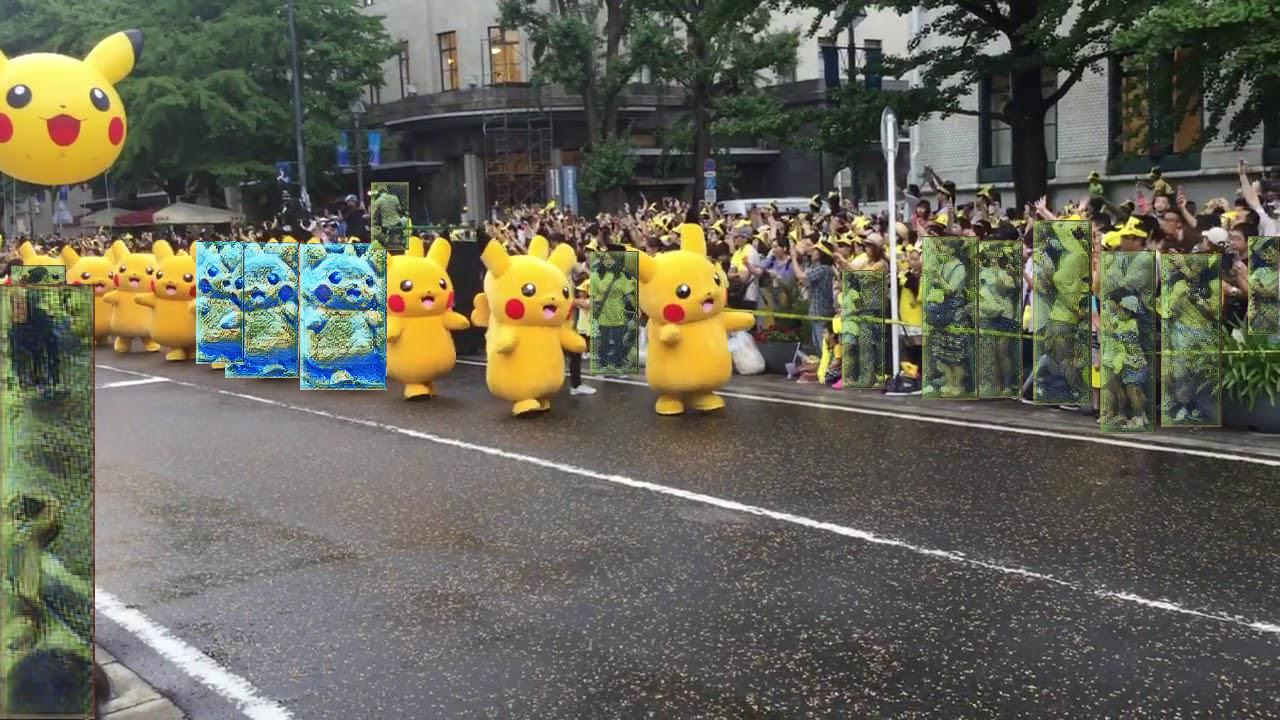

In [7]:
#style change pics obtained through 
#https://reiinakano.github.io/fast-style-transfer-deeplearnjs/
import glob
typeObj = []
#replace save('') and glob("") with your directories
images = glob.glob("/Users/ryan/Documents/Art185-final/style test/mods/*.jpg")
modObj = []
for i in images:
    typeObj.append(PIL.Image.open(i))
for i in range(len(images)):
    typeObj[i] = typeObj[i].convert('RGB')
    typeObj[i] = typeObj[i].resize((objs[i].width,objs[i].height))
    #typeObj[i].show()
    modObj.append(numpy.array(typeObj[i]))

for i in range(len(images)):
    for j in range(objs[i].height):
        for k in range(objs[i].width):
            for l in range(3):
                img[j+objs[i].top][k+objs[i].left][l] = modObj[i][j][k][l]

madImg1 = PIL.Image.fromarray(img, 'RGB')
madImg1.save('/Users/ryan/Documents/Art185-final/test/madImg1.jpg', 'JPEG')
show_img_PIL(PIL.Image.fromarray(img))

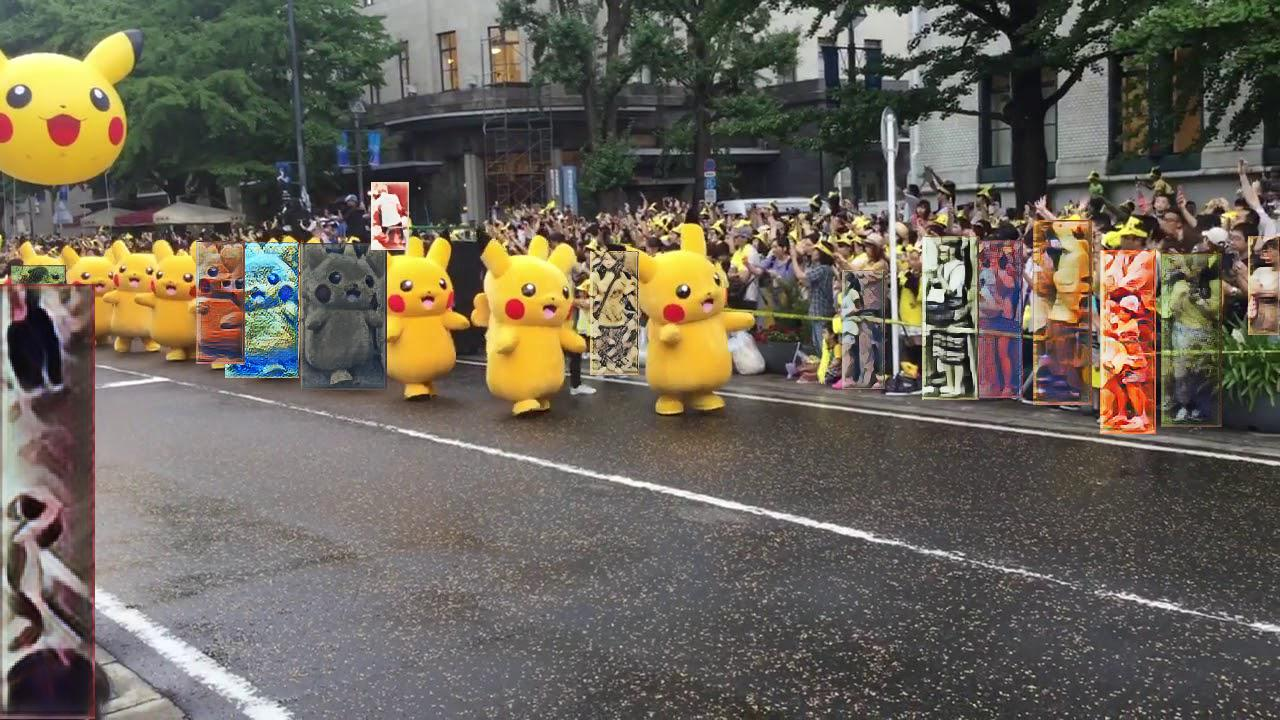

In [8]:
typeObj2 = []
images2 = glob.glob("/Users/ryan/Documents/Art185-final/style test/mods/varied/*.jpg")
modObj2 = []
for i in images2:
    typeObj2.append(PIL.Image.open(i))
for i in range(len(images2)):
    typeObj2[i] = typeObj2[i].convert('RGB')
    typeObj2[i] = typeObj2[i].resize((objs[i].width,objs[i].height))
    #typeObj2[i].show()
    modObj2.append(numpy.array(typeObj2[i]))

for i in range(len(images2)):
    for j in range(objs[i].height):
        for k in range(objs[i].width):
            for l in range(3):
                img2[j+objs[i].top][k+objs[i].left][l] = modObj2[i][j][k][l]

madImg2 = PIL.Image.fromarray(img2, 'RGB')
madImg2.save('/Users/ryan/Documents/Art185-final/test/madImg2.jpg', 'JPEG')
show_img_PIL(PIL.Image.fromarray(img2))

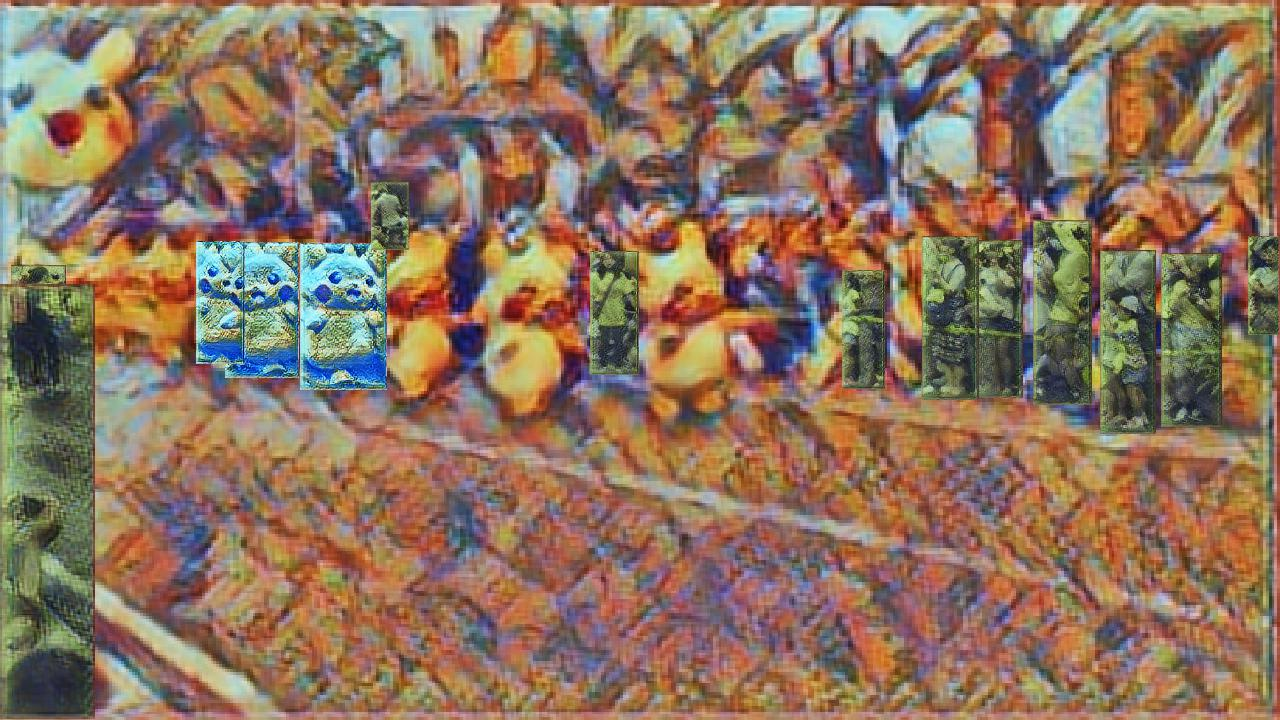

In [9]:
newMain = PIL.Image.open("/Users/ryan/Documents/Art185-final/style test/mainComp7.jpg")
newMain = newMain.resize((1280,720))
newMain = newMain.convert('RGB')
#newMain.show()
newBack = numpy.array(newMain)
newBack2 = newBack

for i in range(len(images)):
    for j in range(objs[i].height):
        for k in range(objs[i].width):
            for l in range(3):
                newBack[j+objs[i].top][k+objs[i].left][l] = modObj[i][j][k][l]
madImg3 = PIL.Image.fromarray(newBack, 'RGB')
madImg3.save('/Users/ryan/Documents/Art185-final/test/madImg3.jpg', 'JPEG')
show_img_PIL(PIL.Image.fromarray(newBack))

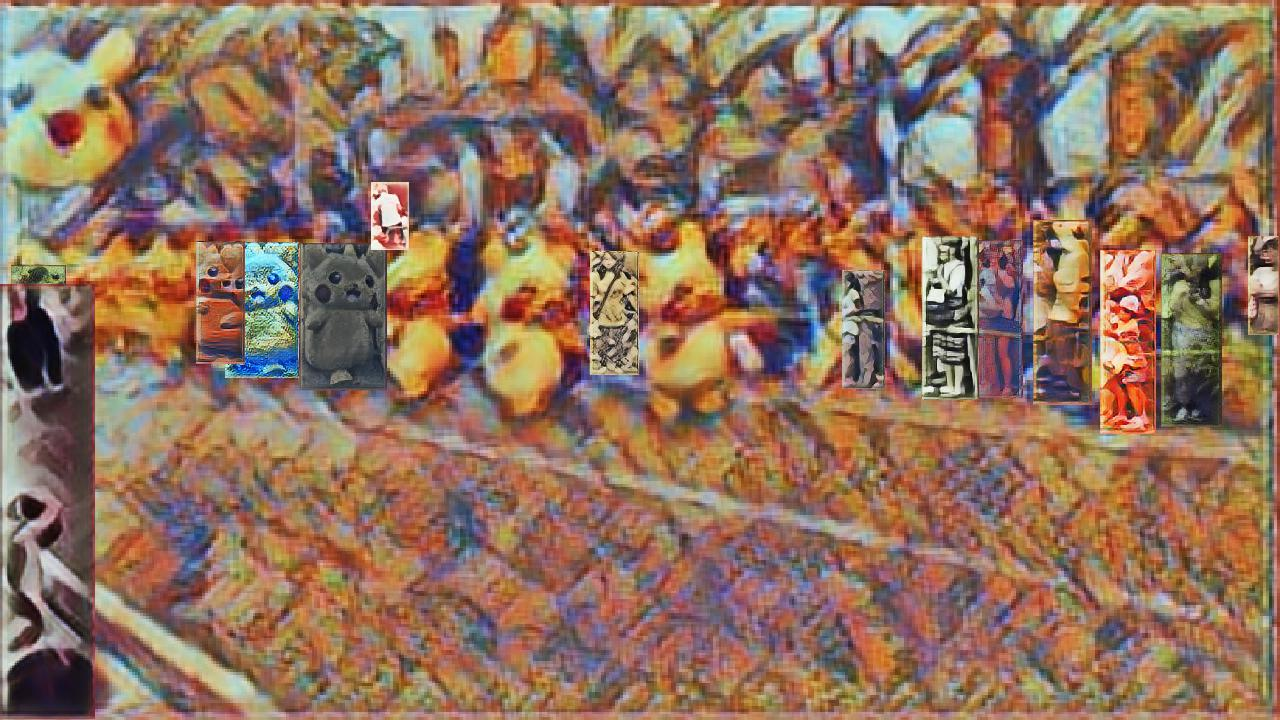

In [10]:
for i in range(len(images2)):
    for j in range(objs[i].height):
        for k in range(objs[i].width):
            for l in range(3):
                newBack2[j+objs[i].top][k+objs[i].left][l] = modObj2[i][j][k][l]
madImg4 = PIL.Image.fromarray(newBack2, 'RGB')
madImg4.save('/Users/ryan/Documents/Art185-final/test/madImg4.jpg', 'JPEG')
show_img_PIL(PIL.Image.fromarray(newBack2))

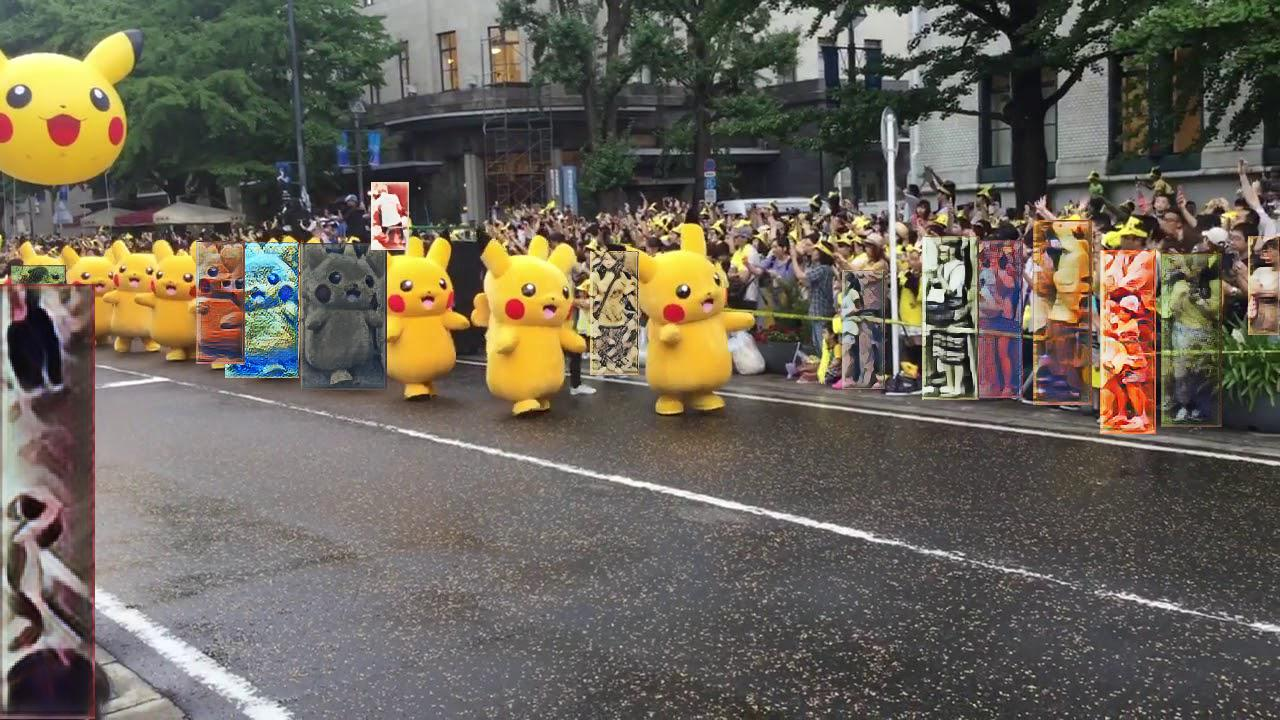

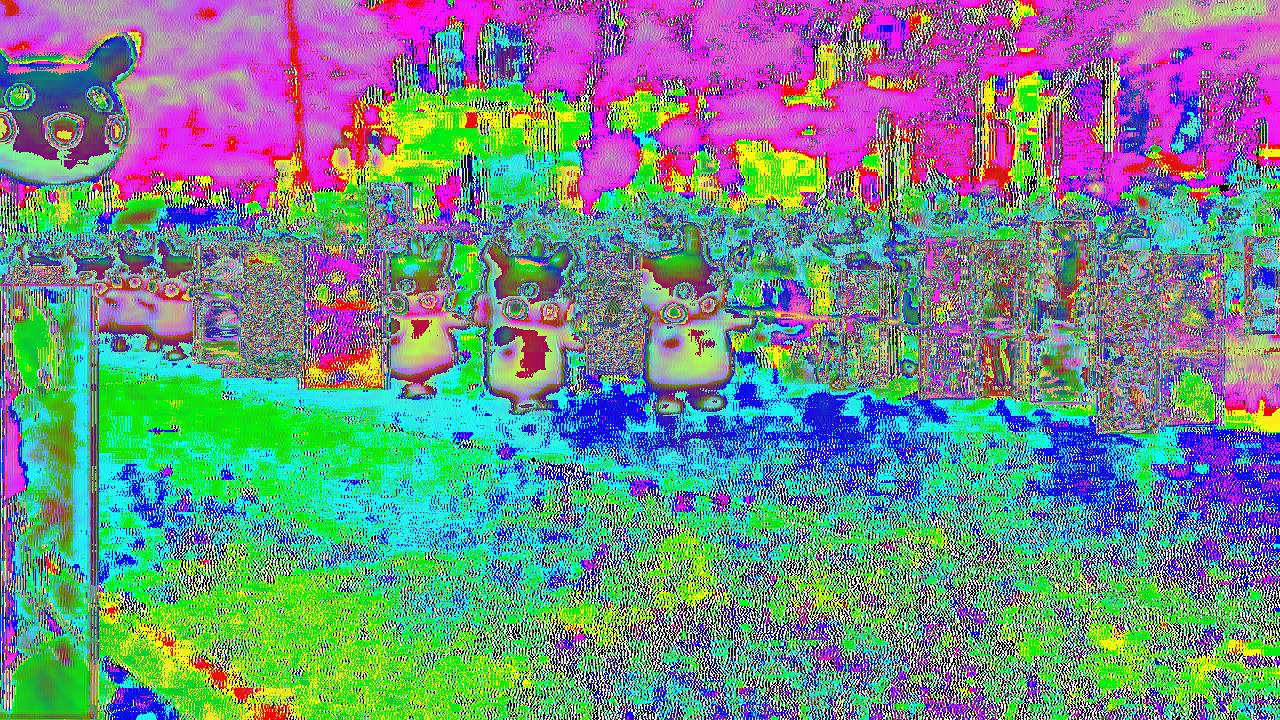

In [13]:
#replace save('') with your directory
def smoother(image, objects, n):
    
    weights = [[[0,-1,0],
               [-1,4,-1],
               [0,-1,0],
               [0,-1,0],
               [-1,4,-1],
               [0,-1,0],
               [0,-1,0],
               [-1,4,-1],
               [0,-1,0]]]
    #mod = ndimage.generic_filter(image, numpy.mean, size = n, mode='nearest')
    mod = ndimage.convolve(image, weights, mode = 'nearest')
    show_img_PIL(PIL.Image.fromarray(image))
    show_img_PIL(PIL.Image.fromarray(mod))
    smoothFail = PIL.Image.fromarray(mod, 'RGB')
    smoothFail.save('/Users/ryan/Documents/Art185-final/test/smoothFail.jpg', 'JPEG')
smoother(img, objs, 3)